In [91]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import seaborn as sns

In [3]:
data = "C:/Users/Magus/Desktop/cartobcn/Excels/barris_data_final.xlsx"
df = pd.read_excel(data)

In [4]:
test = df.sort_values(['Household_income_dis (Barcelona = 100)'], ascending=[0])

In [414]:
#CPI Catalunia
cpi_cat = r"C:/Users/Magus/Documents/Projects/Citython2018/CATCPI.csv"
#CPI Spain
cpi_esp = r"C:/Users/Magus/Documents/Projects/Citython2018/ESPCPI.csv"
#Income Levels 
incomes = r"C:/Users/Magus/Documents/Projects/Citython2018/Income.csv"
#Mental Health Patients CatStat
mpatients = r"C:/Users/Magus/Documents/Projects/Citython2018/mentalpatients.csv"
#Mental Health Beds by CatStat
mbeds = r"C:/Users/Magus/Documents/Projects/Citython2018/mentalbeds.csv"
#People per Doctors by CatStat
ptod = r"C:/Users/Magus/Documents/Projects/Citython2018/patientstodoctor.csv"
#Population Growth by CatStat
pgro = r"C:/Users/Magus/Documents/Projects/Citython2018/pgrowth.csv"
#Rent
rnt = r"C:/Users/Magus/Documents/Projects/Citython2018/rent.csv"
#District Population
dpo = r"C:/Users/Magus/Documents/Projects/Citython2018/districtpop.csv"


catcpi = pd.read_csv(cpi_cat, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
espcpi = pd.read_csv(cpi_esp, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
income = pd.read_csv(incomes, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
mbed = pd.read_csv(mbeds, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
mpatient = pd.read_csv(mpatients, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
pperd = pd.read_csv(ptod, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
pgrowth = pd.read_csv(pgro, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
rent = pd.read_csv(rnt, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )
dpop = pd.read_csv(dpo, delimiter=";", error_bad_lines=False, encoding = "ISO-8859-1" )


Text(0.5, 1.0, 'Rent Price Evolution')

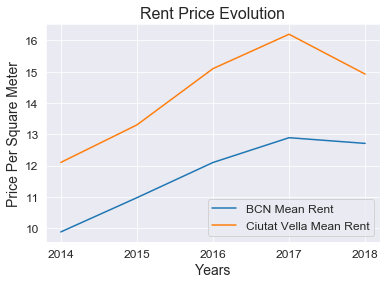

In [415]:
bcnrent = []
cvrent = []
y = ["2014","2015","2016","2017","2018"]

bcnrent.append(rent["2014"].mean())
bcnrent.append(rent["2015"].mean())
bcnrent.append(rent["2016"].mean())
bcnrent.append(rent["2017"].mean())
bcnrent.append(rent["2018"].mean())

cvrent.append(rent["2014"][:4].mean())
cvrent.append(rent["2015"][:4].mean())
cvrent.append(rent["2016"][:4].mean())
cvrent.append(rent["2017"][:4].mean())
cvrent.append(rent["2018"][:4].mean())

plt.plot(y,bcnrent)
plt.plot(y,cvrent)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("Years", size=14)
plt.ylabel("Price Per Square Meter", size=14)
plt.legend(["BCN Mean Rent", "Ciutat Vella Mean Rent"], fontsize=12)
plt.title("Rent Price Evolution", size=16)

In [416]:
yearx=[1991,1996,2001,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

In [417]:
child = dpop.loc[1,][1:]
young = dpop.loc[2,][1:]
youngadult = dpop.loc[3,][1:]
oldadult = dpop.loc[4,][1:]
senior = dpop.loc[5,][1:]

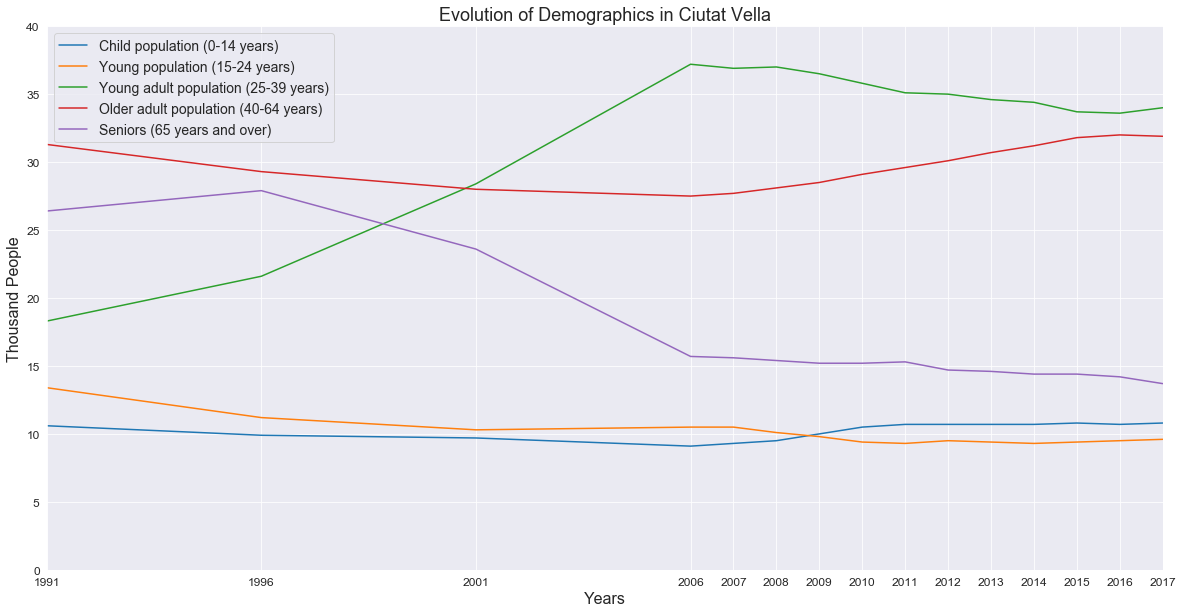

In [418]:
plt.figure(figsize=(20,10))
plt.ylabel("Thousand People", size=16)
plt.ylim([0,40])
plt.xlim([1991,2017])
plt.xticks(yearx, size=12)
plt.yticks(size=12)
plt.xlabel("Years", size=16)
plt.title("Evolution of Demographics in Ciutat Vella", size=18)
plt.plot(yearx, child)
plt.plot(yearx, young)
plt.plot(yearx, youngadult)
plt.plot(yearx, oldadult)
plt.plot(yearx, senior)
plt.legend(dpop["Years"][1:6], fontsize=14, loc=0)

Text(0.5, 1.0, 'Index of Aging in Ciutat Vella')

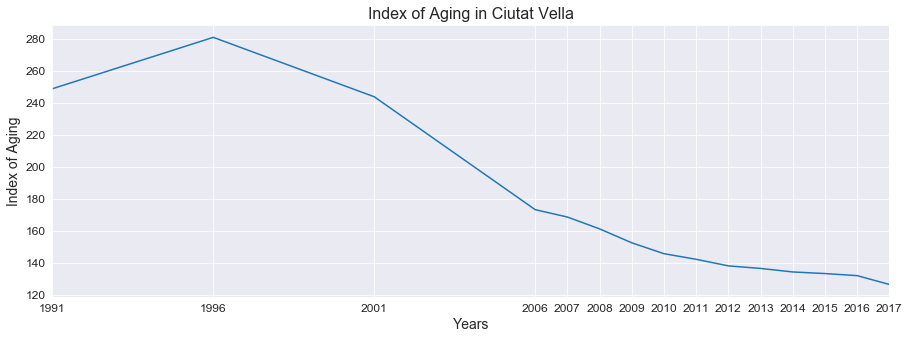

In [419]:
plt.figure(figsize=(15,5))
Aindex = dpop.loc[11,][1:]
plt.plot(yearx, Aindex)
plt.xlim([1991,2017])
plt.ylabel("Index of Aging", size=14)
plt.xticks(yearx, size=12)
plt.yticks(size=12)
plt.xlabel("Years", size=14)
plt.title("Index of Aging in Ciutat Vella", size=16)

([<matplotlib.axis.YTick at 0x1b66ecf4128>,
 <a list of 11 Text yticklabel objects>)

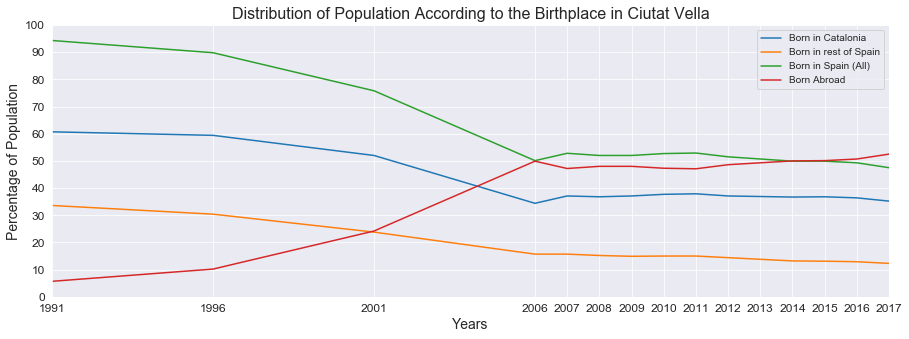

In [455]:
plt.figure(figsize=(15,5))
pop_local = dpop.loc[7,][1:]
pop_regional = dpop.loc[8,][1:]
pop_international = dpop.loc[9,][1:]
pop_esp = dpop.loc[7,][1:]+dpop.loc[8,][1:]

plt.plot(yearx, pop_local)
plt.plot(yearx, pop_regional)
plt.plot(yearx, pop_esp)
plt.plot(yearx, pop_international)

leg = ["Born in Catalonia", "Born in rest of Spain", "Born in Spain (All)", "Born Abroad"]
plt.legend(leg)
plt.title("Distribution of Population According to the Birthplace in Ciutat Vella", fontsize=16)
plt.ylim(0,100)
plt.xlim([1991,2017])
plt.xlabel("Years", size=14)
plt.ylabel("Percentage of Population", size=14)
plt.xticks(yearx, size=12)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],size=12)

Text(0.5, 1.0, 'Mentally Disabled Distribution')

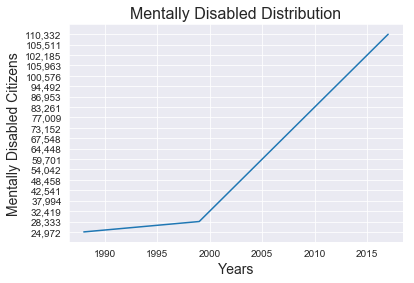

In [454]:
plt.plot(mpatient["Years"][::-1],mpatient["Mental illness Value"][::-1])
plt.xlabel("Years", size=14)
plt.ylabel("Mentally Disabled Citizens", size=14)
plt.title("Mentally Disabled Distribution", size=16)

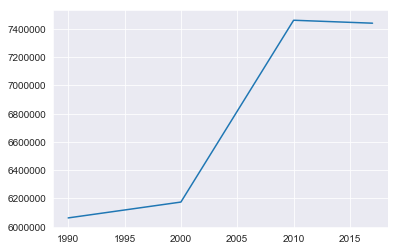

In [442]:
ys = [1990,2000,2010,2017] 
catpop = [6062273,6174547,7462044,7441176]
plt.plot(ys,catpop)

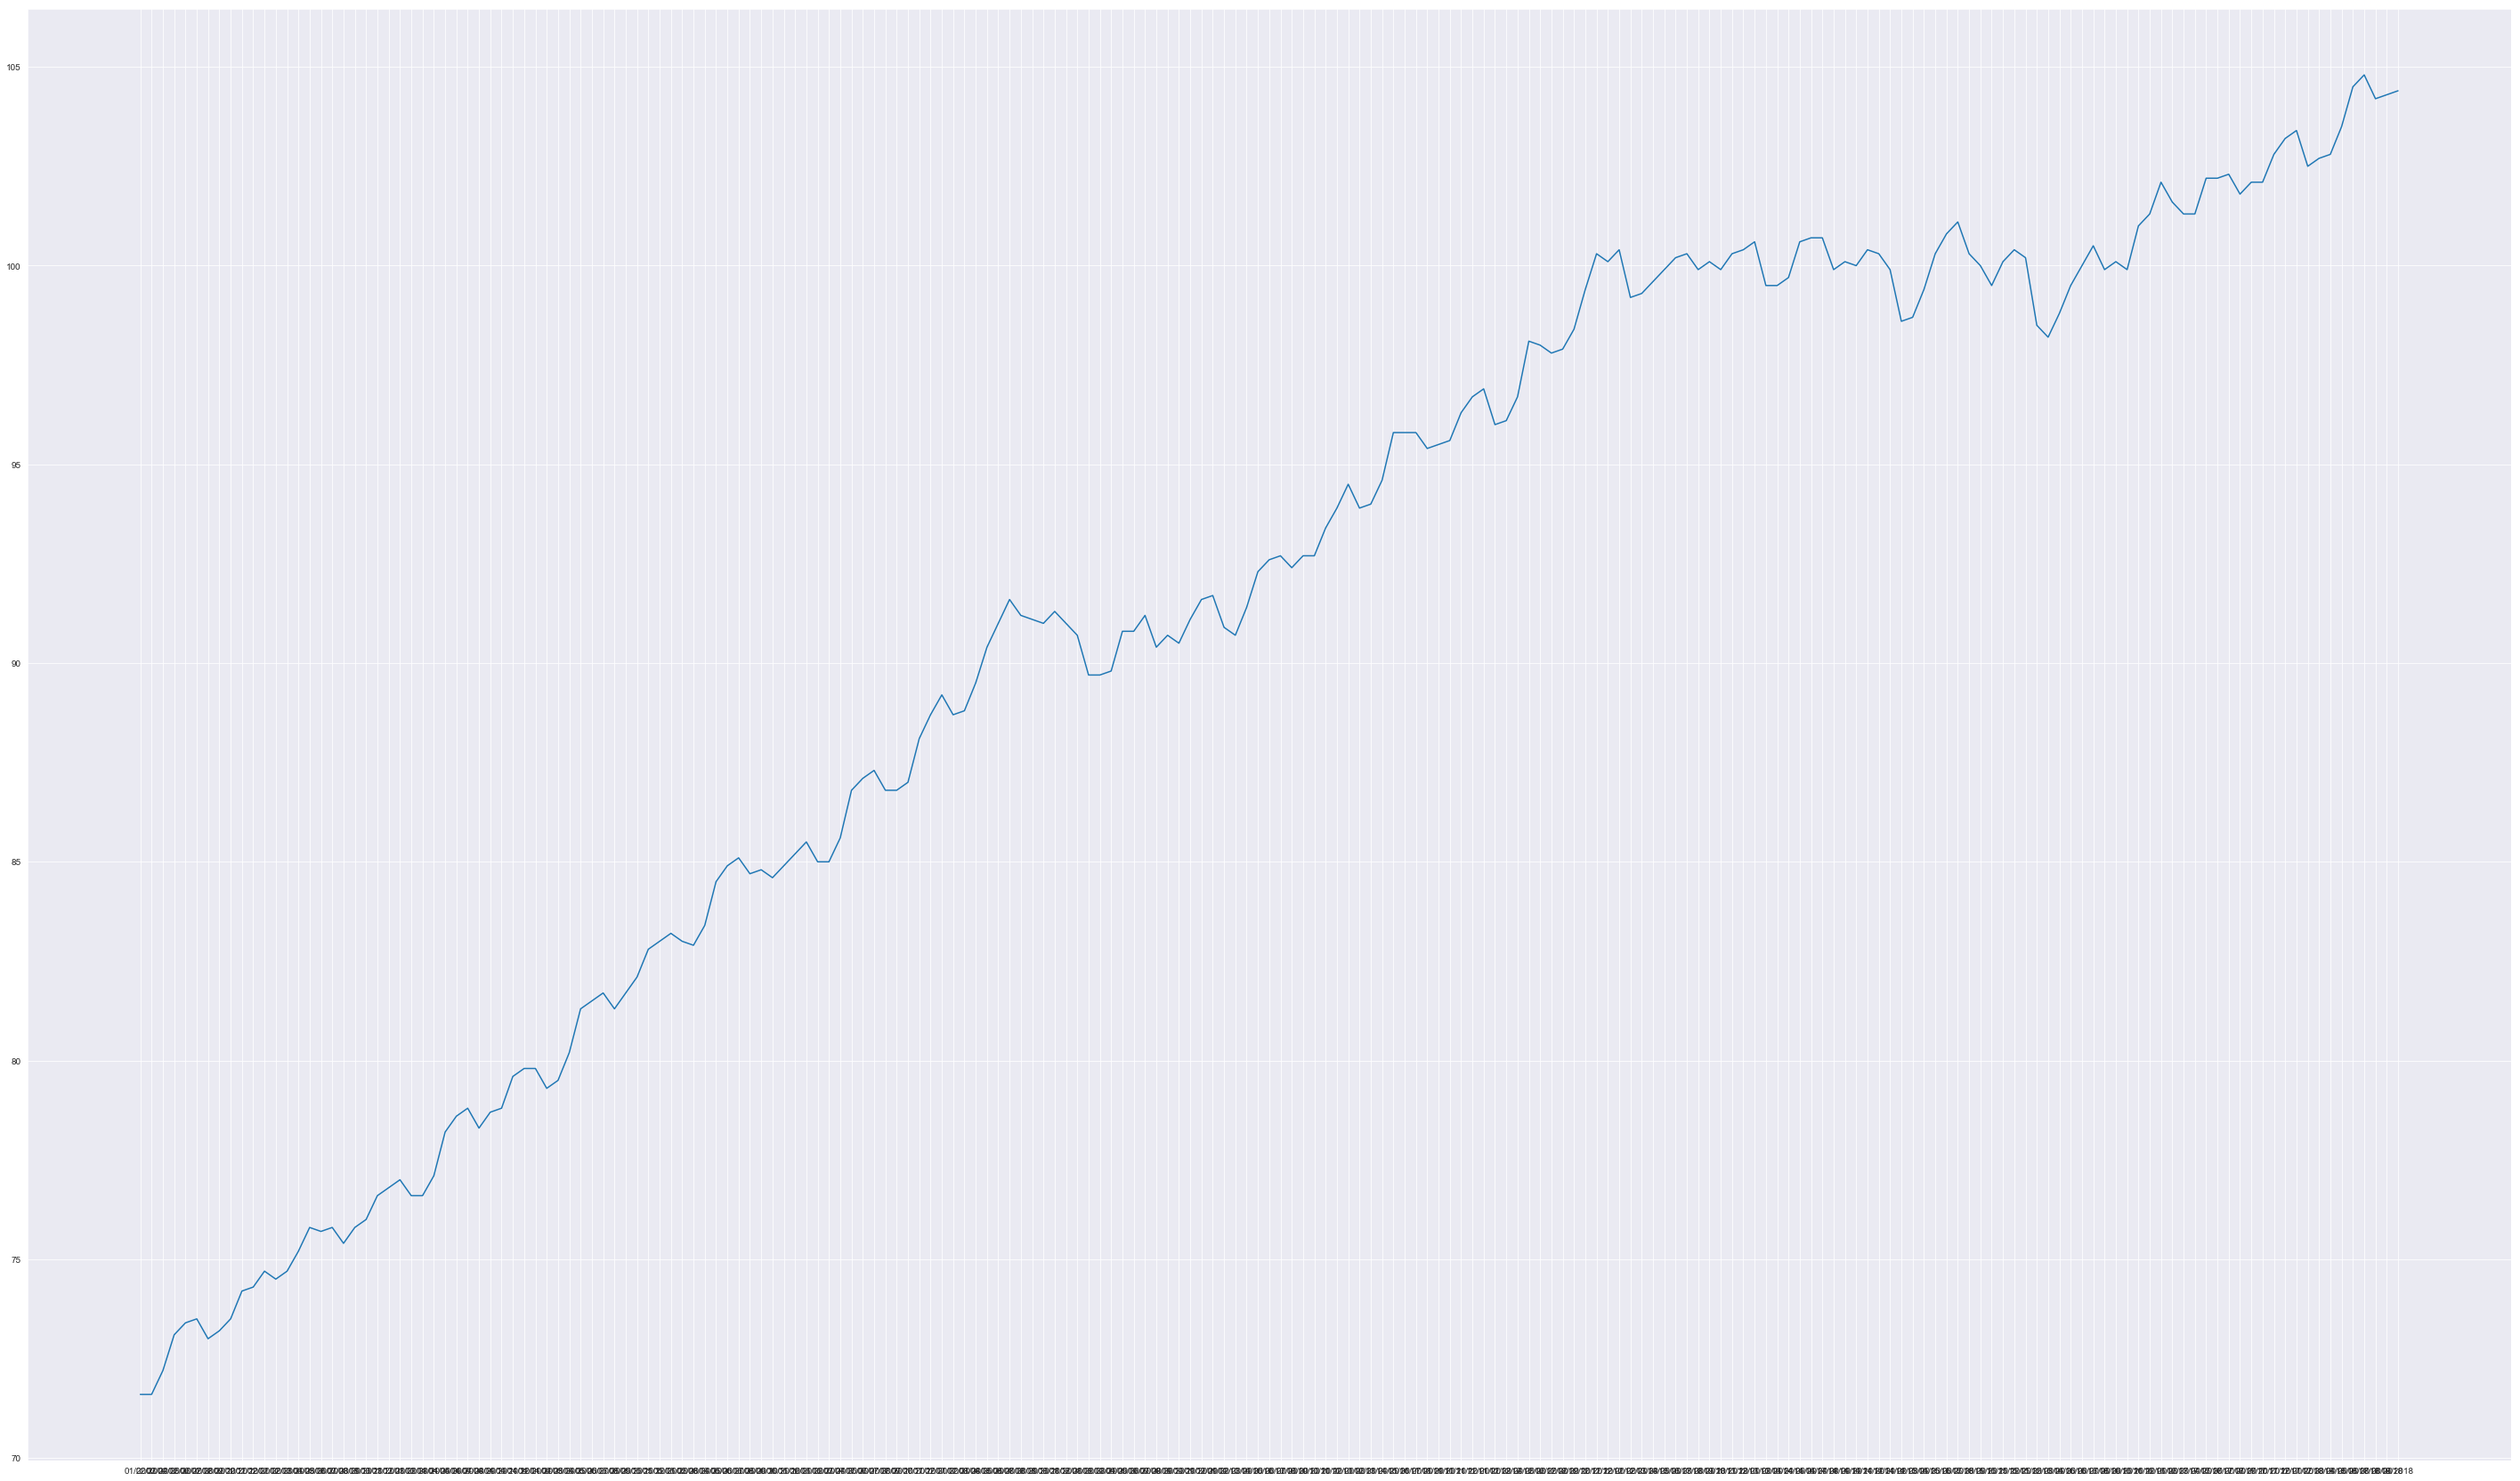

In [423]:
plt.figure(figsize=(50,30))
plt.plot(catcpi["Unnamed: 0"][::-1],catcpi["General index"][::-1])

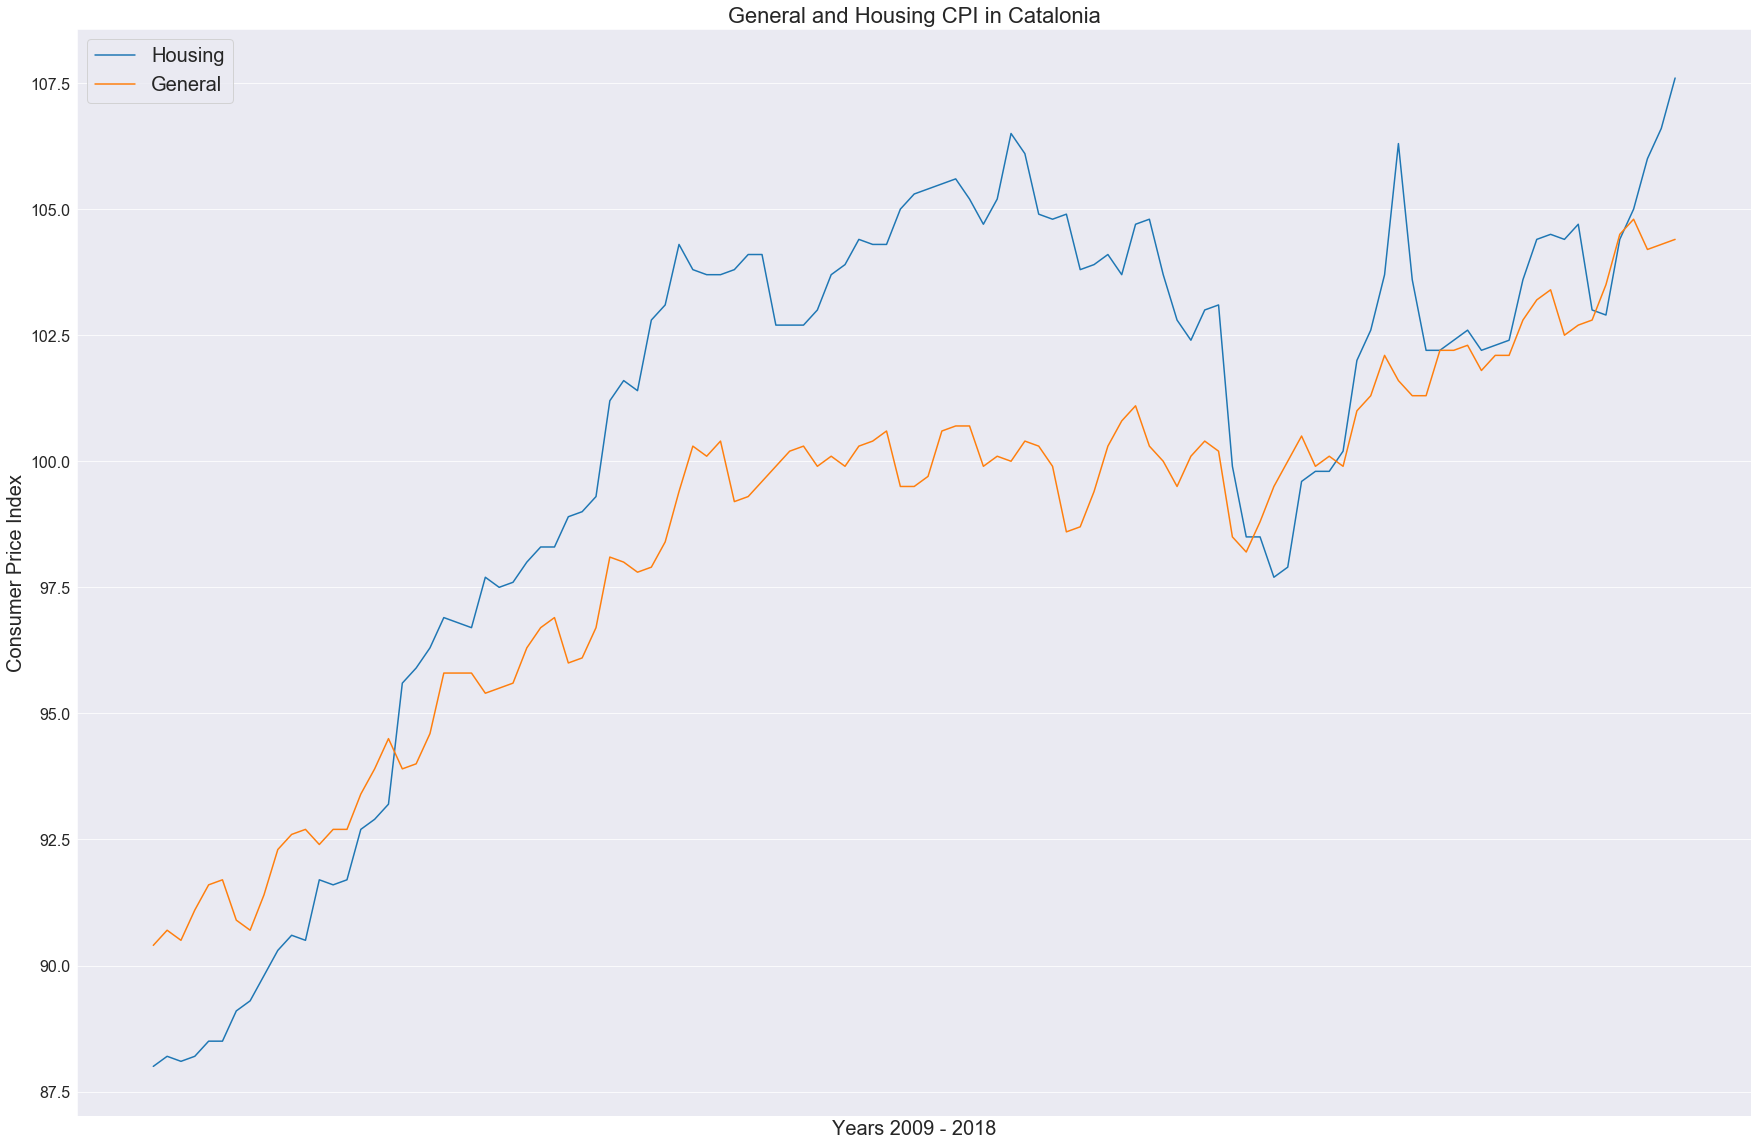

In [441]:
plt.figure(figsize=(30,20))  #%20 increase in housing prices in Catalonia
plt.plot(catcpi["Unnamed: 0"][::-1][90:],catcpi["Housing"][::-1][90:])
plt.plot(catcpi["Unnamed: 0"][::-1][90:],catcpi["General index"][::-1][90:])
plt.xticks([])
plt.yticks(size=16)
plt.ylabel("Consumer Price Index", size=20)
plt.xlabel("Years 2009 - 2018", size=20)
plt.title("General and Housing CPI in Catalonia", size=22)
plt.legend(["Housing", "General"], fontsize=20)

In [390]:
z = income.iloc[::-1] # %5 decrease in household income in Catalonia

Text(0.5, 1.0, 'Household Income In Catalonia & Spain')

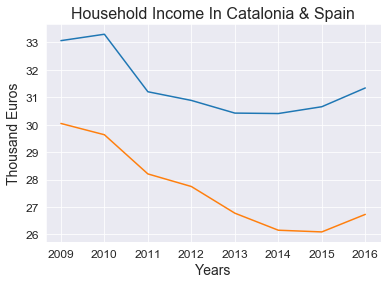

In [412]:
plt.plot(z["Years"],z["Per household/ Catalonia"])
plt.plot(z["Years"],z["Per Household / Spain"])
plt.ylabel("Thousand Euros", size=14)
plt.xlabel("Years", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Household Income In Catalonia & Spain", size=16)

Text(0.5, 1.0, 'Per Person Income In Catalonia & Spain')

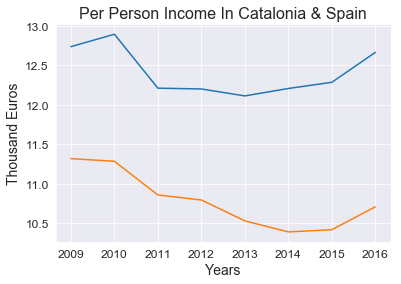

In [413]:
plt.plot(z["Years"],z["Per person/ Catalonia"])
plt.plot(z["Years"],z["Per person / Spain"])
plt.ylabel("Thousand Euros", size=14)
plt.xlabel("Years", size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Per Person Income In Catalonia & Spain", size=16)

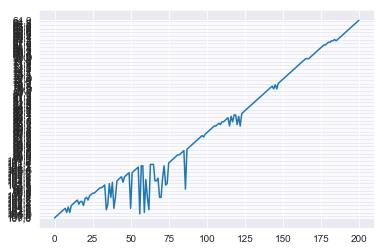

In [373]:
 plt.plot(catcpi[],catcpi["Housing"]) #%20 increase in housing prices in Catalonia